## 🔧 Setup Instructions

- If you are running this project in **Anaconda/Jupyter Notebook**, please install the following libraries before starting:
  ```bash
  pip install pytrends pandas matplotlib seaborn plotly
  ```
- If you are running this project in Google Colab, these libraries are already pre-installed, so you can skip the installation step.

In [2]:
# importing the libraries
import pandas as pd                 # Pandas → used for handling and analyzing structured data (dataframes, CSVs, Excel, etc.)
import matplotlib.pyplot as plt     # Matplotlib → base plotting library for static charts (line, bar, scatter, etc.)
import seaborn as sns               # Seaborn → statistical data visualization built on Matplotlib (prettier, easier plots)
import plotly.express as px         # Plotly Express → interactive plotting library (hover, zoom, dynamic charts)
from pytrends.request import TrendReq  # PyTrends → unofficial Google Trends API to fetch search trend data

# Setup Pytrend Library and define keyword

In [3]:
# Create a PyTrends request object
# hl='en-US' → sets language to English (US)
# tz=360 → sets time zone offset
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keyword to analyze in Google Trends
# Here, we are looking at the search term "cloud computing"
keyword = "cloud computing"

# Data Request

In [4]:
# Build the payload (request) for Google Trends
# [keyword] → the search term(s) you want to analyze (must be in a list)
# cat = 0 → category (0 means "all categories")
# timeframe = 'today 12-m' → past 12 months
# geo = '' → location (empty = worldwide; e.g., 'US' for United States, 'IN' for India)
# gprop = '' → type of Google search (empty = all; 'images' = Google Images, 'news' = Google News, 'youtube' = YouTube, 'froogle' = Google Shopping)
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

# Country Wise Interest

In [17]:
import time

# Fetch interest by region (country, state, or city depending on geo)
# This returns a DataFrame with regions as rows and search interest as values
region_data = pytrends.interest_by_region()

# Add a delay to avoid hitting API rate limits
time.sleep(10) # Adjust the sleep time as needed

# Sort the regions based on the search interest for the given keyword
# by=keyword → sort by the column that matches our keyword ("cloud computing")
# ascending=False → highest interest first (descending order)
# head(15) → take only the top 15 regions with the most interest
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

/tmp/ipython-input-4186313241.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword], y=region_data.index, palette="Reds_d")


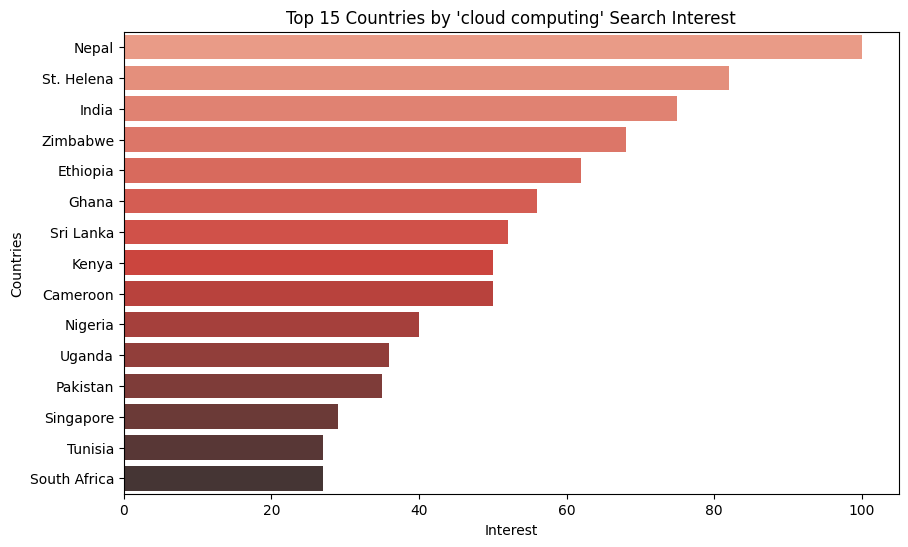

In [33]:
# Set the figure size → 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Create a horizontal barplot with Seaborn
# x = region_data[keyword] → values of search interest for the keyword
# y = region_data.index → region names (countries, since geo='' by default)
# palette="Reds_d" → use a red gradient color palette (darker = higher intensity)
sns.barplot(x=region_data[keyword], y=region_data.index, palette="Reds_d")

# Set the chart title dynamically using the keyword
plt.title(f"Top 15 Countries by '{keyword}' Search Interest")

# Label the x-axis
plt.xlabel("Interest")

# Label the y-axis
plt.ylabel("Countries")

# Render (show) the plot
plt.show()


# World Map

In [35]:
# Reset the index so that 'geoName' (country names) becomes a normal column
# By default, region_data had regions as index, this makes them accessible as a column
region_data = region_data.reset_index()

# Create a choropleth (world map colored by values)
fig = px.choropleth(
    region_data,
    locations='geoName',              # column that contains country names
    locationmode='country names',     # tells Plotly that 'geoName' contains country names (not ISO codes)
    color=keyword,                    # the values used to color each country (search interest)
    title=f"Search interest for '{keyword}' by country",  # dynamic chart title
    color_continuous_scale='Reds'     # color scale (light red = low interest, dark red = high interest)
)

# Show the interactive map
fig.show()


# Time Wise Interest

In [52]:
time_df = pytrends.interest_over_time()

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



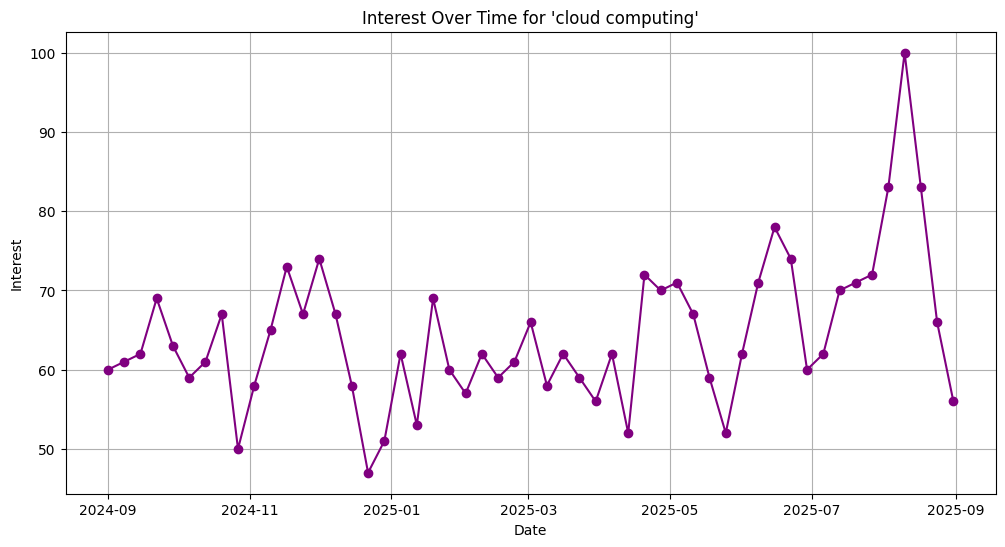

In [53]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', linestyle='-', color="purple")
plt.title(f"Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple Keywords Comparision

In [54]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



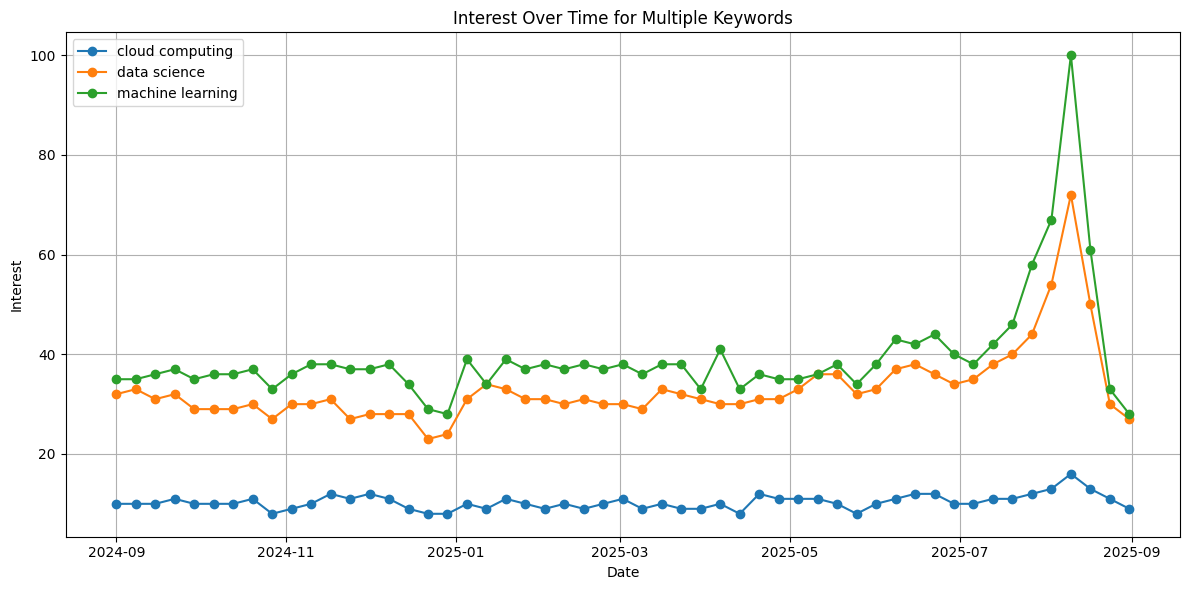

In [110]:
import time

compare_df = pytrends.interest_over_time()

time.sleep(10) # Add a delay here

plt.figure(figsize=(12,6))
for kw in kw_list:
  plt.plot(compare_df.index, compare_df[kw], marker='o', linestyle='-', label=kw)
plt.title("Interest Over Time for Multiple Keywords")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()